In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame()

In [ ]:
data['age'] = [3,15,80,54,2,6,20,35,49,5]
data['shoe_size'] = [26,37,42,38,18,30,40,41,45,28]
data['weight'] = [17,50,75,82,12,25,55,68,72,19]

In [ ]:
data

,age,shoe_size,weight
0,3,26,17
1,15,37,50
2,80,42,75
3,54,38,82
4,2,18,12
5,6,30,25
6,20,40,55
7,35,41,68
8,49,45,72
9,5,28,19


from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['shoe_size'].plot(kind='hist', bins=20, title='shoe_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='shoe_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='shoe_size', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['shoe_size'].plot(kind='line', figsize=(8, 4), title='shoe_size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def normalize(col):
    if abs(col.std(ddof=0)) < 10**(-10):
        return 0
    return (col - col.mean()) / col.std(ddof=0)
data_1 = data.apply(normalize)
data_1

,age,shoe_size,weight
0,-0.944369,-1.042729,-1.192781
1,-0.470209,0.306685,0.097769
2,2.098159,0.920055,1.075458
3,1.070812,0.429359,1.349211
4,-0.983882,-2.024121,-1.388319
5,-0.825829,-0.552033,-0.879921
6,-0.272642,0.674707,0.293307
7,0.320058,0.797381,0.801705
8,0.873245,1.288077,0.958136
9,-0.865342,-0.797381,-1.114566


Проверка ручного счёта

In [ ]:
cov_matrix = np.cov(np.transpose(data_1))

In [ ]:
cov_matrix

array([[1.11111111, 0.84046106, 0.98356523],
       [0.84046106, 1.11111111, 1.01093628],
       [0.98356523, 1.01093628, 1.11111111]])

In [ ]:
eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)

print('Собственные числа: ', eigh_val, '\n', sep='\n')
print('Собственные векторы: ', eigh_vec, sep='\n')

Собственные числа: 
[0.05860411 0.27173682 3.0029924 ]


Собственные векторы: 
[[-0.36971533 -0.7384594  -0.5639045 ]
 [-0.47294998  0.67196846 -0.56989183]
 [ 0.79976802  0.05600087 -0.5976914 ]]


In [ ]:
print('Вклад каждой компоненты в "разброс" признаков (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

Вклад каждой компоненты в "разброс" признаков (в %):  [1.7581233602143758, 8.152104602249741, 90.08977203753588]


Использование библиотеки PCA

In [ ]:
from sklearn import decomposition

In [ ]:
pca = decomposition.PCA(n_components=3, svd_solver='full')
pca.fit(data_1)
pca.transform(data_1)

array([[ 1.8396917 ,  0.07009959, -0.1116419 ],
       [ 0.03193995, -0.55878792,  0.10698924],
       [-2.35028523,  0.87093052, -0.35074417],
       [-1.65493583,  0.42667826,  0.48009537],
       [ 2.53813203,  0.71133533,  0.21073114],
       [ 1.30620869, -0.18961609, -0.13732669],
       [-0.40607287, -0.67114237,  0.01627475],
       [-1.11407552, -0.34436114,  0.14572662],
       [-1.79916077, -0.27434756, -0.16576174],
       [ 1.60855785, -0.04078863, -0.19434262]])

In [ ]:
print('Вклад каждой компоненты в "разброс" признаков (в %): ',pca.explained_variance_ratio_)

Вклад каждой компоненты в "разброс" признаков (в %):  [0.90089772 0.08152105 0.01758123]


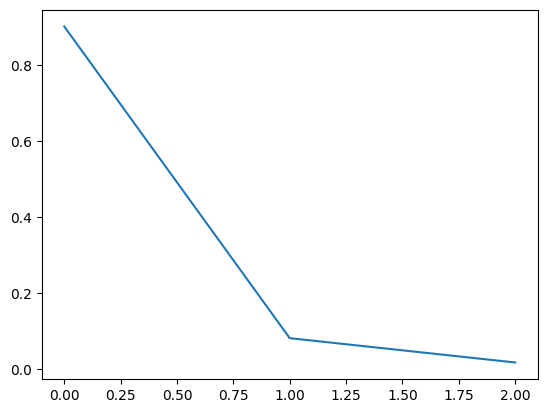

In [ ]:
plt.plot(pca.explained_variance_ratio_) #график дисперсий, являющихся собственными значениями

plt.show()

In [ ]:
print(pca.singular_values_)

[5.19874327 1.56385146 0.72624859]


Анализ признаков с помощью графиков

In [ ]:
#матрица рассеяния - визуализация взаимосвязи между признаками
import plotly.express as px
fig = px.scatter_matrix(data, dimensions=["age", "shoe_size", "weight"])
fig.show()

In [ ]:
import seaborn as sns

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'shoe_size'}>],
       [<Axes: title={'center': 'weight'}>, <Axes: >]], dtype=object)

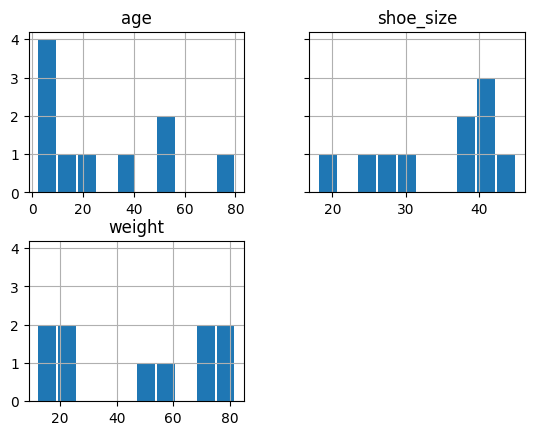

In [ ]:
#построение гистограммы (распределения частот) для каждого признака
data.hist(bins = 10, rwidth= .9, sharey= True)

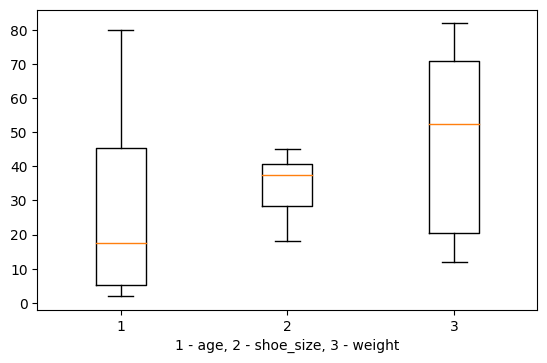

In [ ]:
#Box-plot - визуализация одномерного распределения вероятностей
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_xlabel('1 - age, 2 - shoe_size, 3 - weight')
plt.show()

In [ ]:
#qq-plot - график нормальности данных

In [ ]:
import statsmodels.api as sm

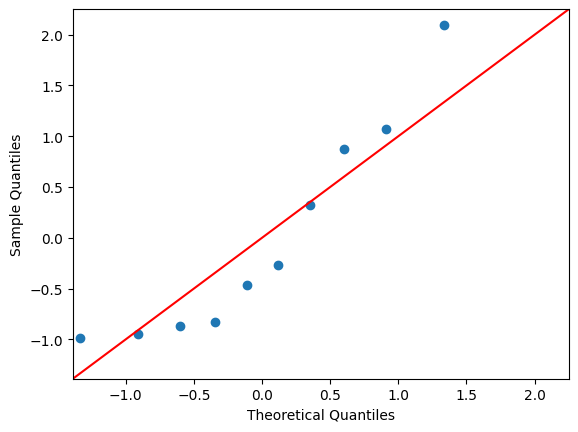

In [ ]:
fig = sm.qqplot(data_1['age'], line='45')
plt.show()

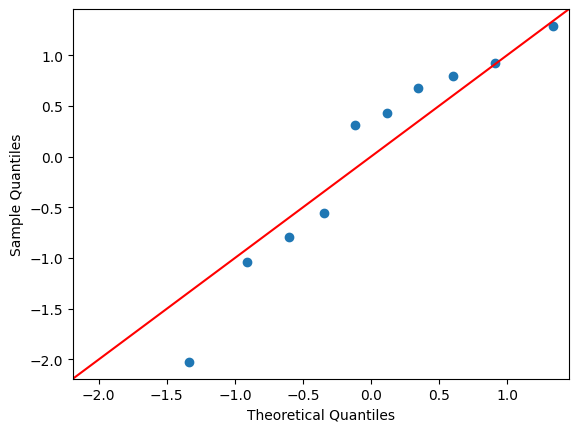

In [ ]:
fig = sm.qqplot(data_1['shoe_size'], line='45')
plt.show()

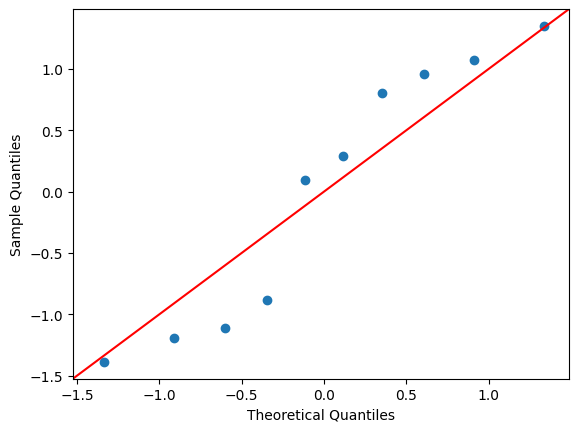

In [ ]:
fig = sm.qqplot(data_1['weight'], line='45')
plt.show()